In [1]:
from sympy import symbols, solve, solveset, S, simplify, expand, nsolve, evalf
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import brentq

In [8]:
file = open('histogram_complexes_time.dat', 'r')


real_iterations = 50000 + 1
time = np.zeros(real_iterations)
A = np.zeros(real_iterations)
P = np.zeros(real_iterations)
T = np.zeros(real_iterations)
AP = np.zeros(real_iterations)
APT = np.zeros(real_iterations)

count = -1
for line in file:
    linesplit = line.split()

    if linesplit[0] == 'Time':
        count += 1
        time[count] = float(linesplit[2])

    if linesplit[1] == 'ap2:' and len(linesplit) == 3:
        A[count]= (int(linesplit[0]))

    if linesplit[1] == 'pip2:' and len(linesplit) == 3:
        P[count] = (int(linesplit[0]))

    if linesplit[1] == 'trans:' and len(linesplit) == 3:
        T[count] = (int(linesplit[0]))
        
    if linesplit[1] == 'pip2:' and len(linesplit) == 5:
        AP[count] = (int(linesplit[0]))
        
    if linesplit[1] == 'pip2:' and len(linesplit) == 7:
        APT[count] = (int(linesplit[0]))

In [3]:
#function to convert molar to nm^-3, or vice versa, and copy numbers 

def converter(Kd, L, molar = True):
    #convert Kd in nanomolar to nm^-3
    if molar == True:
        new_Kd = Kd/1e24 #liters to cubic nanometers
        new_Kd = new_Kd/1e9 #convert nanomoles to moles 
        new_Kd = new_Kd * (6.022*1e23) #convert moles to copies 
        copies = new_Kd * (L**3)
        return new_Kd, copies 
    elif molar == False:
        new_Kd = Kd * 1e24
        new_Kd = new_Kd/(6.022*1e23)
        new_Kd = new_Kd * 1e9
        return new_Kd 



In [4]:
#T
converter(1414, 500)

(8.515107999999999e-07, 106.43884999999999)

In [7]:
#A
converter(5000,500)

(3.0109999999999996e-06, 376.37499999999994)

In [2]:
def solver(Na,Nb,Nc,L,ka1,kb1,ka2,kb2):   
    
    Kd1 = (kb1*(10**-6))/ka1
    Kd2 = (kb2*(10**-6))/(ka2/2)
    
    na_imp = symbols('na_imp', real = True, positive = True)

    nab_imp = (((Nb*na_imp)-(Na*na_imp)+(na_imp**2))/((L**3)*Kd1))

    eq1 = (((nab_imp*(Nc-Na+na_imp+nab_imp))/((L**2)*(Na-na_imp-nab_imp)))-Kd2)

    x = solveset(eq1, na_imp, domain = S.Reals)
    #na = nsolve(eq1, na_imp, -10, dict = True)
    
    
    na = 0 
    for i in list(x):
        if i > 0:
            na = i
    
    nab = (((Nb*na)-(Na*na)+(na**2))/((L**3)*Kd1))
    
    nc = na + nab + Nc - Na
    
    nb = Nb - Na + na
    
    nabc = Nc - nc
    
    na_array = na * np.ones(50001)
    nb_array = nb * np.ones(50001)
    nc_array = nc * np.ones(50001)
    nab_array = nab * np.ones(50001)
    nabc_array = nabc * np.ones(50001)


    print('Free AP2: ' + str(na))
    print('Free PIP2: ' + str(nb))
    print('Free Transferrin: ' + str(nc))
    print('AP2-PIP2: ' + str(nab))
    print('AP2-PIP2-Transferrin: ' + str(nabc))

    return na_array, nb_array, nc_array, nab_array, nabc_array
    

In [65]:
def exp_solver(Na,Nb,Nc,L,ka1,kb1,ka2,kb2):   
    
    Kd1 = (kb1*(10**-6))/ka1
    Kd2 = (kb2*(10**-6))/(ka2)
    
    na_imp = symbols('na_imp', real = True, positive = True)

    nab_imp = (((Nb*na_imp)-(Na*na_imp)+(na_imp**2))/((L**3)*Kd1))

    eq1 = (((nab_imp*(Nc-Na+na_imp+nab_imp))/((L**2)*(Na-na_imp-nab_imp)))-Kd2)

    x = solveset(eq1, na_imp, domain = S.Reals)
    #na = nsolve(eq1, na_imp, -10, dict = True)
    
    
    na = 0 
    for i in list(x):
        if i > 0:
            na = i
    
    nab = (((Nb*na)-(Na*na)+(na**2))/((L**3)*Kd1))
    
    nc = na + nab + Nc - Na
    
    nb = Nb - Na + na
    
    nabc = Nc - nc
    
    na_array = na * np.ones(50001)
    nb_array = nb * np.ones(50001)
    nc_array = nc * np.ones(50001)
    nab_array = nab * np.ones(50001)
    nabc_array = nabc * np.ones(50001)


    print('Free AP2: ' + str(na))
    print('Free PIP2: ' + str(nb))
    print('Free Transferrin: ' + str(nc))
    print('AP2-PIP2: ' + str(nab))
    print('AP2-PIP2-Transferrin: ' + str(nabc))

    return na_array, nb_array, nc_array, nab_array, nabc_array
    

In [ ]:
nab_imp = (((Nb*na_imp)-(Na*na_imp)+(na_imp**2))/((L**3)*Kd1))

eq1 = (((nab_imp*(Nc-Na+na_imp+nab_imp))/((L**2)*(Na-na_imp-nab_imp)))-Kd2)

In [153]:
Na = 500
Nb = 1000
Nc = 100
L = 100
ka1 = 0.1
kb1 = 33
ka2 = 0.1362
kb2 = 48.17
Kd1 = (kb1*10**-6)/ka1
Kd2 = (kb2*10**-6)/(ka2/2)

print(Kd1)
print(Kd2)

0.00032999999999999994
0.0007073421439060207


In [251]:
na_imp, Na, Nb, Nc, L, Kd1, Kd2 = symbols('na_imp, Na, Nb, Nc, L, Kd1, Kd2')


#Kd1 = kb1/ka1
#Kd2 = kb2/(ka2/2)

nab_imp = (((Nb*na_imp)-(Na*na_imp)+(na_imp**2))/((L**3)*Kd1))

eq1 = (((nab_imp*(Nc-Na+na_imp+nab_imp))/((L**2)*(Na-na_imp-nab_imp)))-Kd2)


x = eq1.evalf() #subs = {Na:500, Nb:1000, Nc:100,L:100,Kd1:0.00033,Kd2:0.000707})


#x = simplify(eq1)
simplify(x)
#expand(x)

(-Kd1*Kd2*L**5*(Kd1*L**3*(Na - na_imp) + Na*na_imp - Nb*na_imp - na_imp**2) + na_imp*(-Na + Nb + na_imp)*(Kd1*L**3*(-Na + Nc + na_imp) - Na*na_imp + Nb*na_imp + na_imp**2))/(Kd1*L**5*(Kd1*L**3*(Na - na_imp) + Na*na_imp - Nb*na_imp - na_imp**2))

In [29]:
#Phosphorylation equation

a,A,P,T,Kd1,Kd2,Kd3,L = symbols('a,A,P,T,K_D1,K_D2,K_D3,L')

ap = (a*(P-A+a))/(Kd1*L**3)

app = (a*(P-A+a))/(Kd1*Kd2*L**3)

equation = (app*(T-a+A-ap-app))/((L**2)*(a-A+ap+app))

expand(equation)

-A**2*a**2/(-A*K_D1**2*K_D2**2*L**8 - A*K_D1*K_D2**2*L**5*a - A*K_D1*K_D2*L**5*a + K_D1**2*K_D2**2*L**8*a + K_D1*K_D2**2*L**5*P*a + K_D1*K_D2**2*L**5*a**2 + K_D1*K_D2*L**5*P*a + K_D1*K_D2*L**5*a**2) - A**2*a**2/(-A*K_D1**2*K_D2*L**8 - A*K_D1*K_D2*L**5*a - A*K_D1*L**5*a + K_D1**2*K_D2*L**8*a + K_D1*K_D2*L**5*P*a + K_D1*K_D2*L**5*a**2 + K_D1*L**5*P*a + K_D1*L**5*a**2) - A**2*a/(-A*K_D1*K_D2*L**5 - A*K_D2*L**2*a - A*L**2*a + K_D1*K_D2*L**5*a + K_D2*L**2*P*a + K_D2*L**2*a**2 + L**2*P*a + L**2*a**2) + 2*A*P*a**2/(-A*K_D1**2*K_D2**2*L**8 - A*K_D1*K_D2**2*L**5*a - A*K_D1*K_D2*L**5*a + K_D1**2*K_D2**2*L**8*a + K_D1*K_D2**2*L**5*P*a + K_D1*K_D2**2*L**5*a**2 + K_D1*K_D2*L**5*P*a + K_D1*K_D2*L**5*a**2) + 2*A*P*a**2/(-A*K_D1**2*K_D2*L**8 - A*K_D1*K_D2*L**5*a - A*K_D1*L**5*a + K_D1**2*K_D2*L**8*a + K_D1*K_D2*L**5*P*a + K_D1*K_D2*L**5*a**2 + K_D1*L**5*P*a + K_D1*L**5*a**2) + A*P*a/(-A*K_D1*K_D2*L**5 - A*K_D2*L**2*a - A*L**2*a + K_D1*K_D2*L**5*a + K_D2*L**2*P*a + K_D2*L**2*a**2 + L**2*P*a + L**2*a**2

In [254]:
n_A, N_A, N_P, N_T, L, K_d1, K_d2 = symbols('n_A, N_A, N_P, N_T, L, K_d1, K_d2')


#Kd1 = kb1/ka1
#Kd2 = kb2/(ka2/2)

n_AP = (((N_P*n_A)-(N_A*n_A)+(n_A**2))/((L**3)*K_d1))

eq1 = (((n_AP*(N_T-N_A+n_A+n_AP))/((L**2)*(N_A-n_A-n_AP)))-K_d2)


x = eq1.evalf() #subs = {Na:500, Nb:1000, Nc:100,L:100,Kd1:0.00033,Kd2:0.000707})

x
#x = simplify(eq1)
#simplify(x)
#expand(x)

-K_d2 + (-N_A*n_A + N_P*n_A + n_A**2)*(-N_A + N_T + n_A + (-N_A*n_A + N_P*n_A + n_A**2)/(K_d1*L**3))/(K_d1*L**5*(N_A - n_A - (-N_A*n_A + N_P*n_A + n_A**2)/(K_d1*L**3)))

In [151]:
x, y = symbols('x, y')

y = 7
eq = x**2 + y 

eq.evalf(subs={y:5})

x**2 + 5.0

In [177]:
nab_imp = (((Nb*x)-(Na*x)+(x**2))/((L**3)*Kd1))

eq1 = (((nab_imp*(Nc-Na+x+nab_imp))/((L**2)*(Na-x-nab_imp)))-Kd2)

eq1

-Kd2 + (-Na*(3.03030303030303e-7*(na_imp**2 + 500.0*na_imp)*(0.00303030303030303*na_imp**2 + 2.51515151515152*na_imp - 400.0)/(-0.00303030303030303*na_imp**2 - 2.51515151515152*na_imp + 500.0) - 0.000707) + Nb*(3.03030303030303e-7*(na_imp**2 + 500.0*na_imp)*(0.00303030303030303*na_imp**2 + 2.51515151515152*na_imp - 400.0)/(-0.00303030303030303*na_imp**2 - 2.51515151515152*na_imp + 500.0) - 0.000707) + 4.99849e-7*(0.000428614290000429*(na_imp**2 + 500.0*na_imp)*(0.00303030303030303*na_imp**2 + 2.51515151515152*na_imp - 400.0)/(-0.00303030303030303*na_imp**2 - 2.51515151515152*na_imp + 500.0) - 1)**2)*(-Na + Nc + 3.03030303030303e-7*(na_imp**2 + 500.0*na_imp)*(0.00303030303030303*na_imp**2 + 2.51515151515152*na_imp - 400.0)/(-0.00303030303030303*na_imp**2 - 2.51515151515152*na_imp + 500.0) - 0.000707 + (-Na*(3.03030303030303e-7*(na_imp**2 + 500.0*na_imp)*(0.00303030303030303*na_imp**2 + 2.51515151515152*na_imp - 400.0)/(-0.00303030303030303*na_imp**2 - 2.51515151515152*na_imp + 500.0) - 

In [75]:
A_calc, P_calc, T_calc, AP_calc, APT_calc = exp_solver(3760,500,0,500, ((0.7*1e-3)/.602), .002, .1362, .0029) #(Na,Nb,Nc,L,ka1,kb1,ka2,kb2)


Free AP2: 3290.66465579427
Free PIP2: 30.6646557942654
Free Transferrin: 2.52839527092874e-10
AP2-PIP2: 469.335344205987
AP2-PIP2-Transferrin: -2.52839527092874e-10


In [76]:
L = 500
A = A_calc[1]/L**3
P = P_calc[1]/L**3
T = T_calc[1]/L**3
AP = AP_calc[1]/L**3
APT = APT_calc[1]/L**3


Kobs = (A*P)/(APT+AP)
converter(Kobs, L, molar=False)

2856.19395549801

In [78]:
Kd1 = 2900
Kd2 = 35.35738513360946
T3d = T
T_eq = 0#(T3d/.602)*1e9

Kobs = (Kd1*Kd2)/(Kd2+T_eq)
Kobs

2900.0

In [72]:
converter(((.0029*1e-6)/.1362),500,molar=False)

35.35738513360946

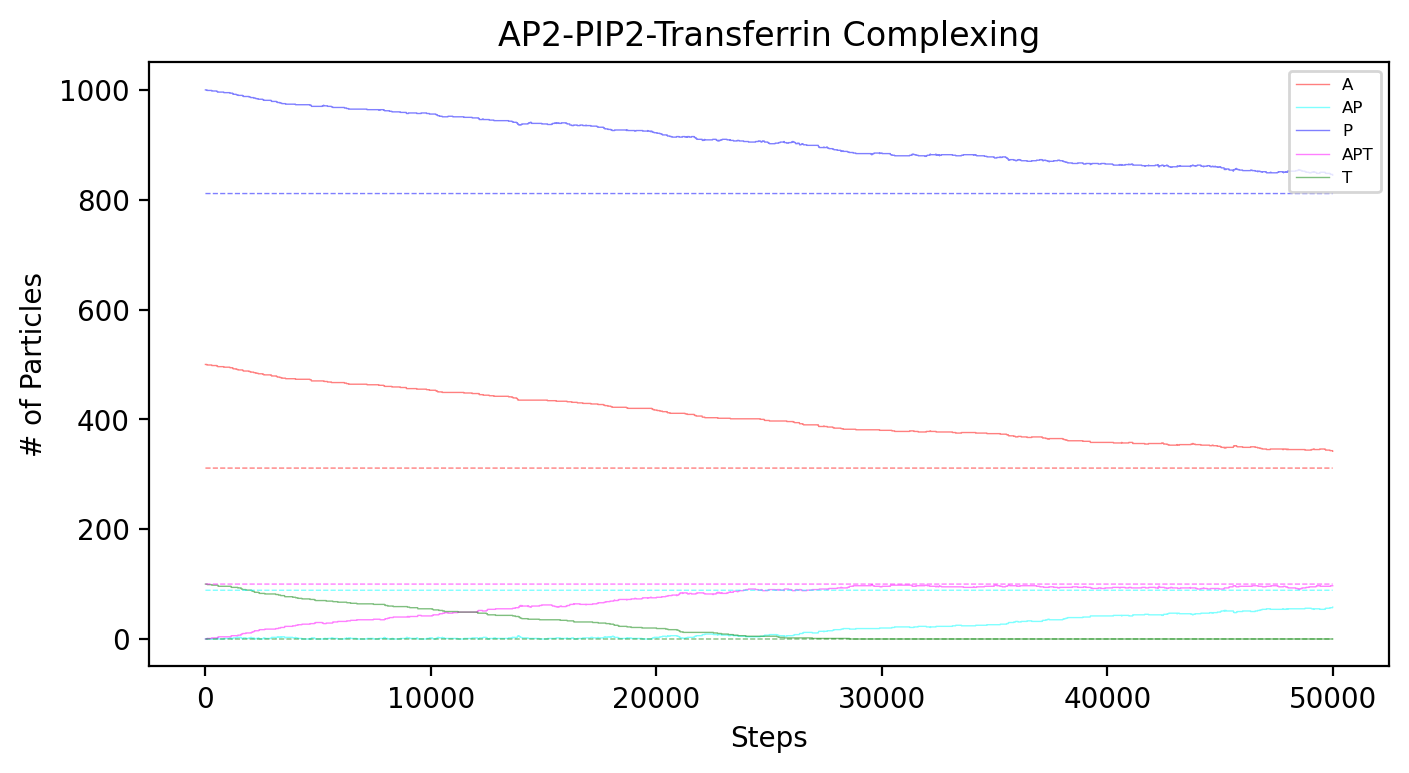

In [11]:
fig = plt.figure(figsize=(8,4),dpi=200)
ax = fig.add_subplot(111)
#ax.scatter(np.arange(step_n+1), path, c='blue',alpha=0.25,s=0.05);
ax.plot(A,c='red',alpha=0.5,lw=0.5,ls='-', label = 'A');
ax.plot(AP,c='cyan',alpha=0.5,lw=0.5,ls='-', label = 'AP');
ax.plot(P,c='blue',alpha=0.5,lw=0.5,ls='-', label = 'P');
ax.plot(APT,c='magenta',alpha=0.5,lw=0.5,ls='-', label = 'APT');
ax.plot(T,c='green',alpha=0.5,lw=0.5,ls='-', label = 'T');
ax.plot(A_calc,c='red',alpha=0.5,lw=0.5,ls='--');
ax.plot(P_calc,c='blue',alpha=0.5,lw=0.5,ls='--');
ax.plot(T_calc,c='green',alpha=0.5,lw=0.5,ls='--');
ax.plot(AP_calc,c='cyan',alpha=0.5,lw=0.5,ls='--');
ax.plot(APT_calc,c='magenta',alpha=0.5,lw=0.5,ls='--');

plt.title('AP2-PIP2-Transferrin Complexing')
plt.xlabel('Steps')
plt.ylabel('# of Particles')
#plt.tight_layout(pad=0)
plt.legend(loc = 'upper right', prop={'size': 6})
plt.savefig('./experimental_copynumbers.png',dpi=250);